# Churn Prediction Modeling

**ChurnChampion: Churn Prediction Modeling**<br>
```Description: Build predictive models using historical customer data to forecast churn rates, enabling the company to implement targeted retention strategies and improve customer loyalty```

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings

# Setting display options and warnings
warnings.filterwarnings("ignore")
sns.set(color_codes=True)

In [2]:
# Loading the dataset
df = pd.read_csv("C:/Users/tirum/Downloads/Hype intern/botswana_bank_customer_churn.csv/botswana_bank_customer_churn.csv")
print(df.head())



   RowNumber                            CustomerId   Surname First Name  \
0          1  83ef0b54-35f6-4f84-af58-5653ac0c0dc4     Smith       Troy   
1          2  009f115a-e5ca-4cf4-97d6-530140545e4e  Sullivan    Katrina   
2          3  66309fd3-5009-44d3-a3f7-1657c869d573    Fuller      Henry   
3          4  b02a30df-1a5f-4087-8075-2a35432da641     Young    Antonio   
4          5  0d932e5b-bb3a-4104-8c83-f84270f7f2ea  Andersen       John   

  Date of Birth  Gender Marital Status  Number of Dependents  \
0    1987-08-29    Male       Divorced                     3   
1    2000-02-07  Female        Married                     1   
2    1954-02-03  Female         Single                     1   
3    1991-01-15  Female       Divorced                     5   
4    1992-04-08  Female       Divorced                     2   

                        Occupation    Income  ...  \
0      Information systems manager  77710.14  ...   
1               Charity fundraiser  58209.87  ...   
2  Te

In [3]:
print(df.shape)

(115640, 25)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [5]:
print(df.describe())

           RowNumber  Number of Dependents         Income  Customer Tenure  \
count  115640.000000         115640.000000  115640.000000    115640.000000   
mean    57820.500000              2.502923   52641.363046        15.490591   
std     33382.536902              1.707249   27429.756390         8.654217   
min         1.000000              0.000000    5000.960000         1.000000   
25%     28910.750000              1.000000   28857.070000         8.000000   
50%     57820.500000              3.000000   52658.110000        15.000000   
75%     86730.250000              4.000000   76364.157500        23.000000   
max    115640.000000              5.000000   99999.510000        30.000000   

        Credit Score  Credit History Length  Outstanding Loans     Churn Flag  \
count  115640.000000          115640.000000      115640.000000  115640.000000   
mean      574.299775              15.546602       25502.731792       0.121878   
std       159.067499               8.654630       1412

In [6]:
print("No. of duplicate rows:", df.duplicated().sum())


No. of duplicate rows: 0


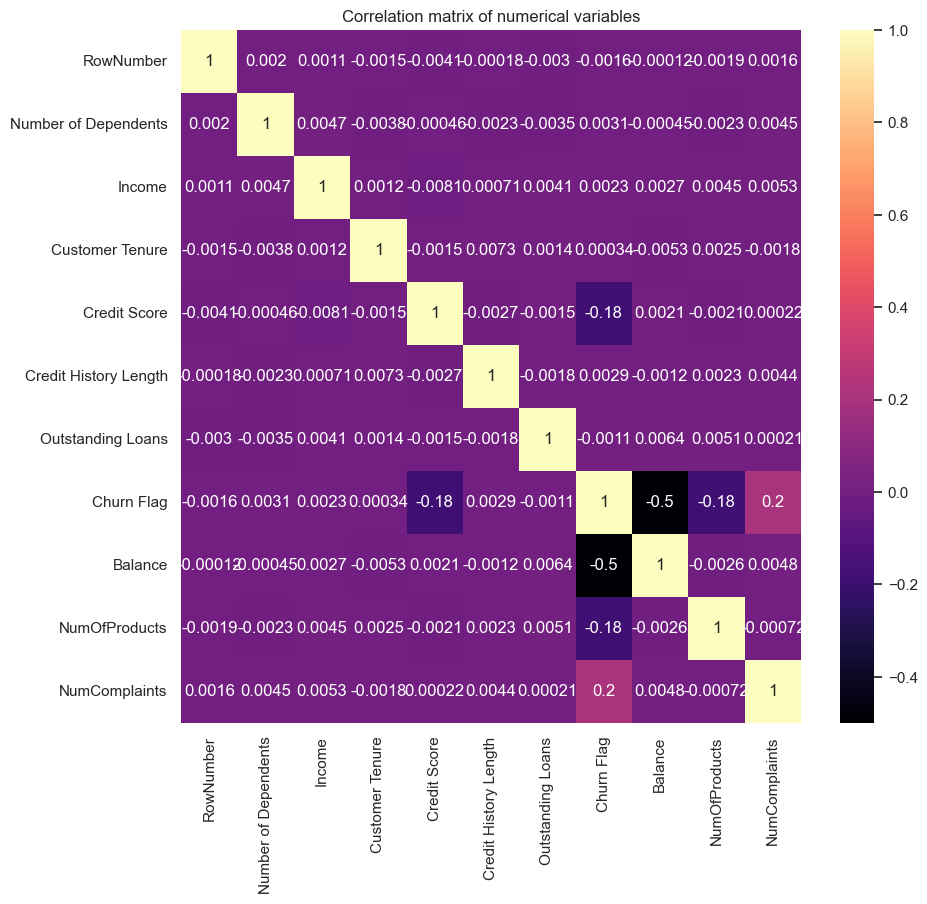

In [7]:
# Correlation Matrix
plt.figure(figsize=(10, 9))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='magma')
plt.title('Correlation matrix of numerical variables')
plt.show()

In [8]:
# Convert 'Churn Flag' to a categorical variable
df['Churn Flag'] = df['Churn Flag'].astype(int)

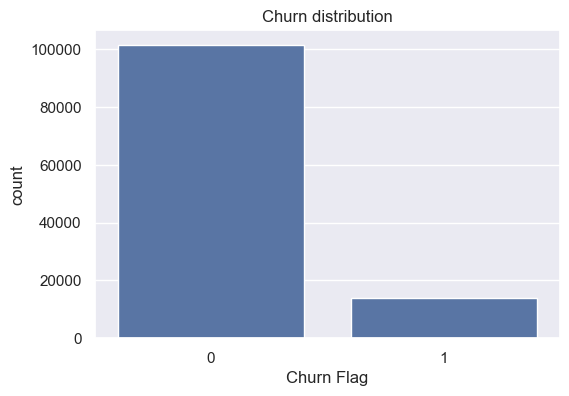

In [9]:
# Visualize the target variable 'Churn Flag' (0=not churn, 1=churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn Flag', data=df)
plt.title("Churn distribution")
plt.show()

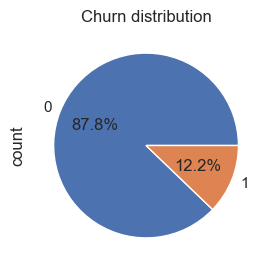

In [10]:
# Pie chart for churn distribution
plt.figure(figsize=(5, 3))
df['Churn Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Churn distribution')
plt.show()

In [11]:
# Converting 'Gender' and 'Marital Status' to numerical values using label encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Marital Status'] = df['Marital Status'].map({'Married': 1, 'Single': 0, 'Divorced': 2, 'Widowed': 3})


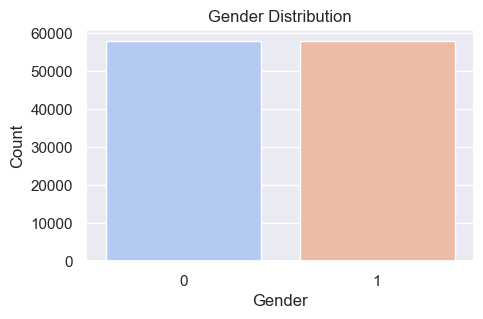

   Gender  Count
0       0  57830
1       1  57810


In [12]:
# Gender Distribution
gender_count = df.groupby('Gender').size().reset_index(name='Count')
plt.figure(figsize=(5, 3))
sns.barplot(x='Gender', y='Count', data=gender_count, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
print(gender_count)

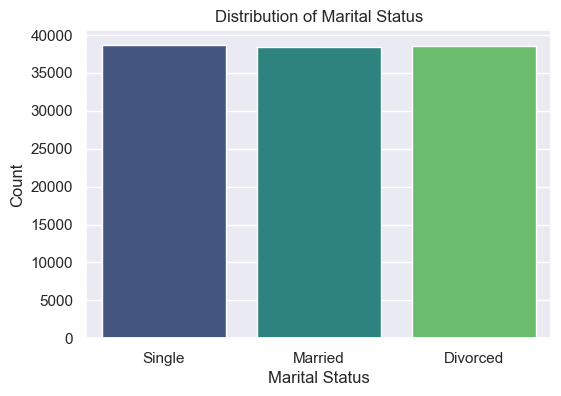

  Marital Status  Count
0         Single  38684
1        Married  38417
2       Divorced  38539


In [13]:
# Marital Status Distribution
marital_status_count = df.groupby('Marital Status').size().reset_index(name='Count')
marital_status_mapping = {1: 'Married', 0: 'Single', 2: 'Divorced', 3: 'Widowed'}
marital_status_count['Marital Status'] = marital_status_count['Marital Status'].map(marital_status_mapping)
plt.figure(figsize=(6, 4))
sns.barplot(x='Marital Status', y='Count', data=marital_status_count, palette='viridis')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()
print(marital_status_count)

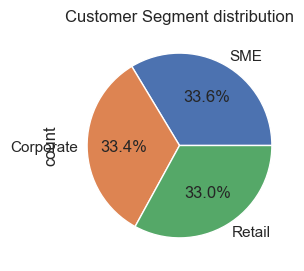

In [14]:
# Customer Segment Distribution
plt.figure(figsize=(8, 3))
df['Customer Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Segment distribution')
plt.show()

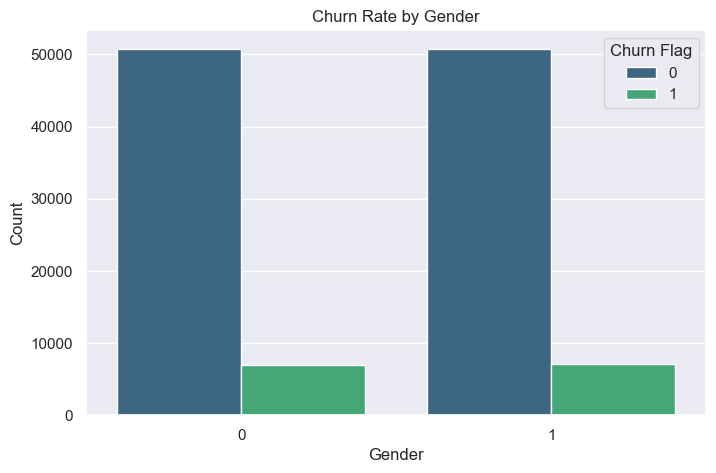

In [15]:
# Churn Rate by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Churn Flag', palette='viridis')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

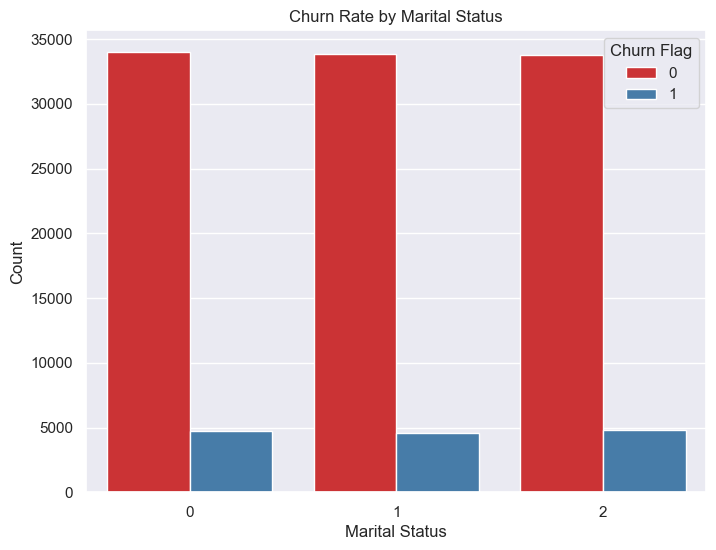

In [16]:
# Churn Rate by Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marital Status', hue='Churn Flag', palette='Set1')
plt.title('Churn Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [17]:
# Checking for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 RowNumber                               0
CustomerId                              0
Surname                                 0
First Name                              0
Date of Birth                           0
Gender                                  0
Marital Status                          0
Number of Dependents                    0
Occupation                              0
Income                                  0
Education Level                         0
Address                                 0
Contact Information                     0
Customer Tenure                         0
Customer Segment                        0
Preferred Communication Channel         0
Credit Score                            0
Credit History Length                   0
Outstanding Loans                       0
Churn Flag                              0
Churn Reason                       101546
Churn Date                         101546
Balance                                 0
Nu

In [18]:

# Convert Date columns to datetime and create 'Age' feature
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
df['Churn Date'] = pd.to_datetime(df['Churn Date'], errors='coerce')
df['Age'] = pd.Timestamp.now().year - df['Date of Birth'].dt.year

In [19]:
# Income Category
df['Income Category'] = pd.cut(df['Income'], bins=[0, 20000, 40000, 60000, 80000, 100000], 
                                labels=['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High'])


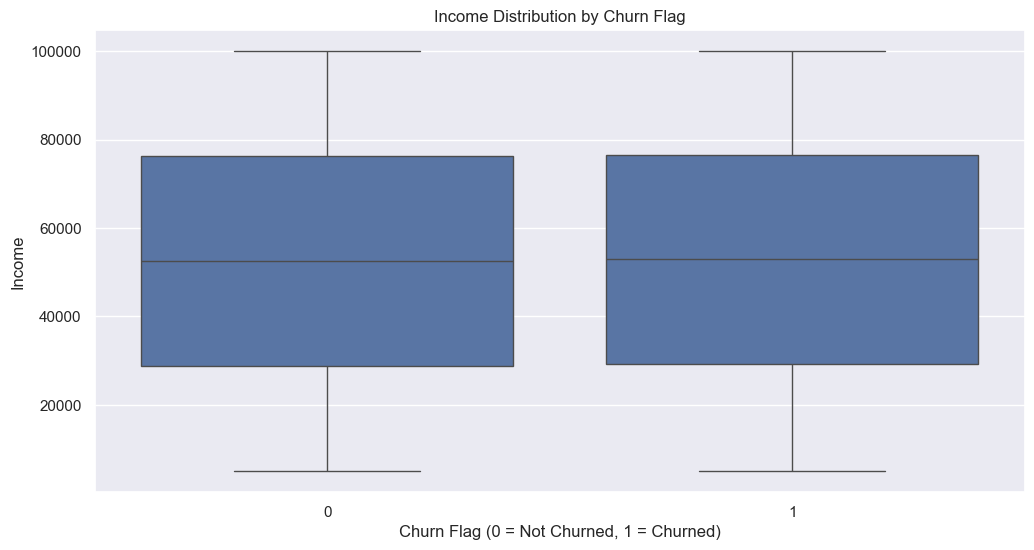

In [20]:
# Boxplot of Income by Churn Flag
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn Flag', y='Income', data=df)
plt.title('Income Distribution by Churn Flag')
plt.xlabel('Churn Flag (0 = Not Churned, 1 = Churned)')
plt.ylabel('Income')
plt.show()

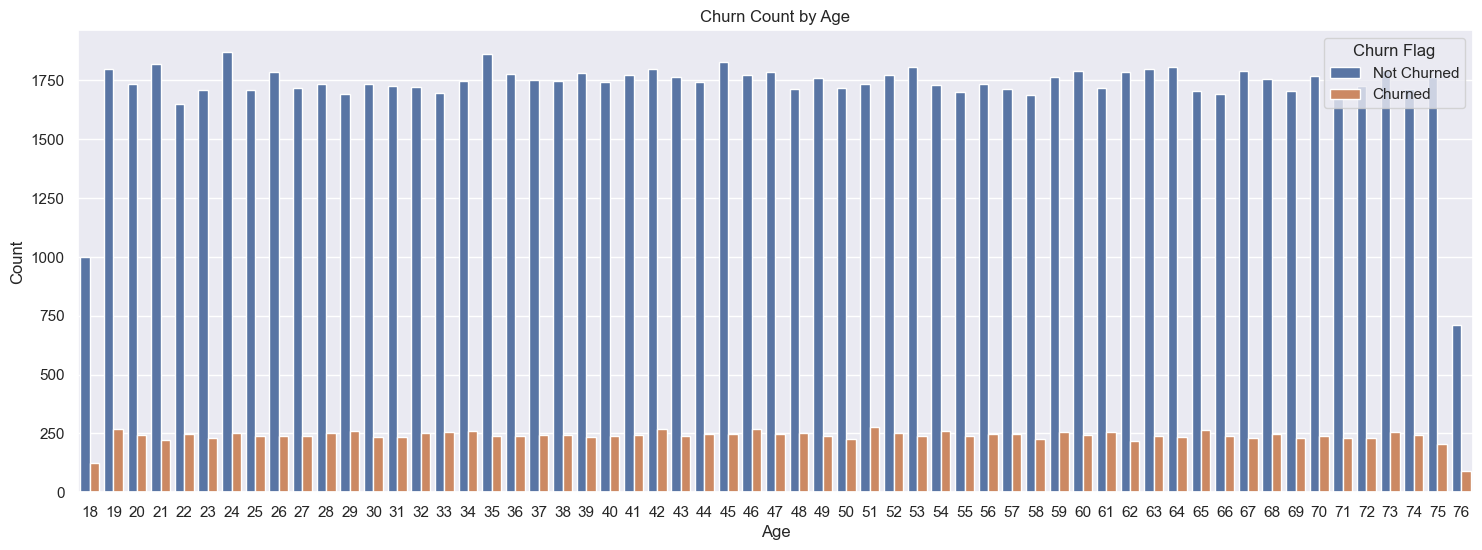

In [21]:
# Age and Churn Flag
plt.figure(figsize=(18, 6))
sns.countplot(x='Age', hue='Churn Flag', data=df)
plt.title('Churn Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Churn Flag', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

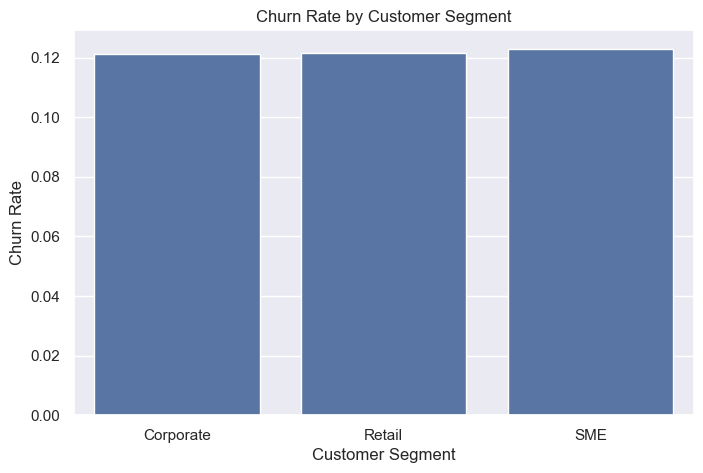

  Customer Segment  Churn Rate
0        Corporate    0.121043
1           Retail    0.121555
2              SME    0.123024


In [22]:
# Churn Rate by Customer Segment
churn_rate_segment = df.groupby('Customer Segment')['Churn Flag'].mean().reset_index()
churn_rate_segment.columns = ['Customer Segment', 'Churn Rate']
plt.figure(figsize=(8, 5))
sns.barplot(x='Customer Segment', y='Churn Rate', data=churn_rate_segment)
plt.title('Churn Rate by Customer Segment')
plt.ylabel('Churn Rate')
plt.xlabel('Customer Segment')
plt.show()
print(churn_rate_segment)

In [23]:
# Label Encoding for categorical variables
le = LabelEncoder()
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Education Level', 'Customer Segment', 
                        'Preferred Communication Channel', 'Income Category']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

In [24]:
# Splitting the data into training and testing sets
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'First Name', 'Date of Birth', 'Address', 
             'Contact Information', 'Churn Flag', 'Churn Reason', 'Churn Date'], axis=1)
y = df['Churn Flag']

In [25]:
X.head()

,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Balance,NumOfProducts,NumComplaints,Age,Income Category
0,1,2,3,318,77710.14,2,30,1,1,397,24,41959.74,211359.05,1,0,37,4
1,0,1,1,84,58209.87,2,27,2,0,665,10,8916.67,30624.76,4,1,24,3
2,0,0,1,597,9794.01,2,14,1,0,715,21,43270.54,111956.61,2,6,70,1
3,0,2,5,26,15088.98,2,23,0,1,747,17,17887.65,201187.61,1,0,33,1
4,0,2,2,585,60726.56,3,22,0,0,549,25,32686.84,60391.24,5,6,32,4


In [26]:
y

0         0
1         0
2         0
3         0
4         0
         ..
115635    1
115636    0
115637    0
115638    0
115639    1
Name: Churn Flag, Length: 115640, dtype: int32

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9879367001037703
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     20301
           1       0.98      0.92      0.95      2827

    accuracy                           0.99     23128
   macro avg       0.98      0.96      0.97     23128
weighted avg       0.99      0.99      0.99     23128

Confusion Matrix:
 [[20245    56]
 [  223  2604]]


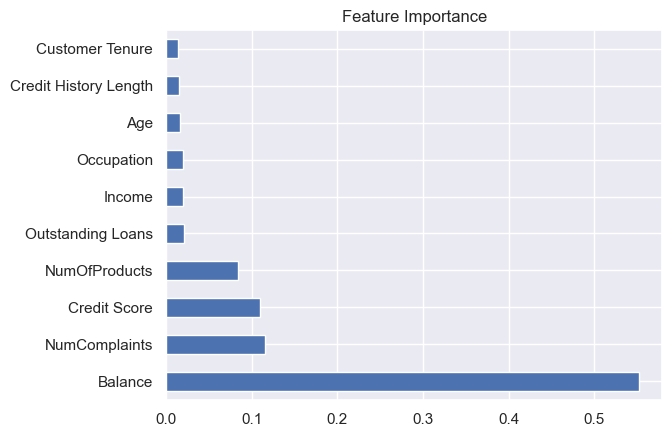

In [30]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

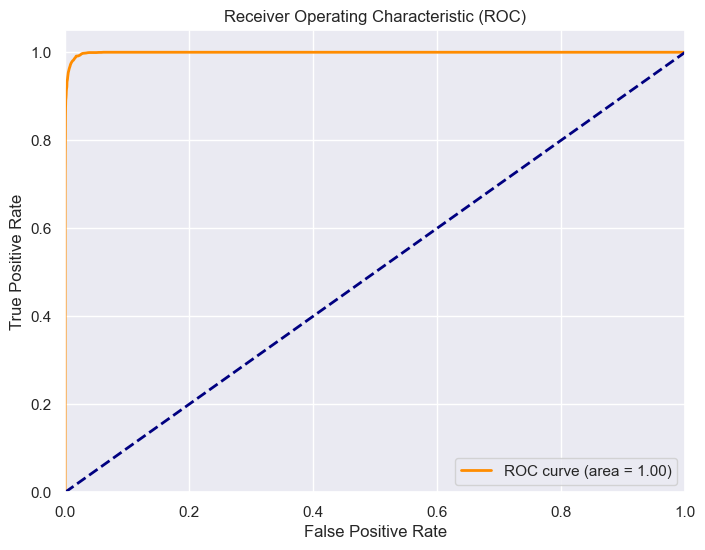

In [31]:
# AUC-ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [32]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Dummy data (replace these with actual values)
y_true = np.random.choice([0, 1], size=1000)  # Actual labels
y_probs = np.random.rand(1000)  # Model probabilities

# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Simple Interactive Classification Dashboard"),
    
    # Slider to adjust the classification threshold
    html.Label("Adjust Threshold:"),
    dcc.Slider(
        id='threshold-slider',
        min=0.0,
        max=1.0,
        step=0.01,
        value=0.5,
        marks={i / 10: f"{i / 10:.1f}" for i in range(11)},
    ),
    
    # Div to display accuracy and confusion matrix
    html.Div(id="metrics-div", style={'margin-top': '20px'}),
    dcc.Graph(id="confusion-matrix")
])

# Callback to update accuracy and confusion matrix based on threshold
@app.callback(
    [Output("metrics-div", "children"),
     Output("confusion-matrix", "figure")],
    [Input("threshold-slider", "value")]
)
def update_dashboard(threshold):
    # Calculate predictions based on the threshold
    y_pred = (y_probs >= threshold).astype(int)
    
    # Calculate accuracy
    accuracy = (y_true == y_pred).mean()
    
    # Generate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    confusion_data = pd.DataFrame([[tn, fp], [fn, tp]], 
                                  columns=["Predicted 0", "Predicted 1"], 
                                  index=["Actual 0", "Actual 1"])
    
    # Display accuracy
    metrics = [html.H3(f"Accuracy: {accuracy:.2f}")]
    
    # Plot the confusion matrix
    fig = px.imshow(confusion_data, text_auto=True, color_continuous_scale="Blues")
    fig.update_layout(title="Confusion Matrix", xaxis_title="Predicted", yaxis_title="Actual")

    return metrics, fig

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True, port=8051)
    
    
